In [29]:
pip install tensorflow

  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.5.1 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.14.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_train = pathlib.Path(r"E:\img\melanoma_cancer_dataset\train")
data_test = pathlib.Path(r"E:\img\melanoma_cancer_dataset\test")

In [3]:
image_count_train = len(list(data_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_test.glob('*/*.jpg')))
print(image_count_test)

9605
1000


In [4]:
batch_size = 32
img_height = 28
img_width = 28

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_train,
    seed=123,
    validation_split = 0.1,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=(batch_size))

Found 9605 files belonging to 2 classes.
Using 8645 files for training.


In [6]:
import tensorflow as tf
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_test,
    seed=123,
    validation_split = 0.1,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=(batch_size))

Found 1000 files belonging to 2 classes.
Using 900 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_train,
    seed=123,
    validation_split = 0.1,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=(batch_size))

Found 9605 files belonging to 2 classes.
Using 960 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


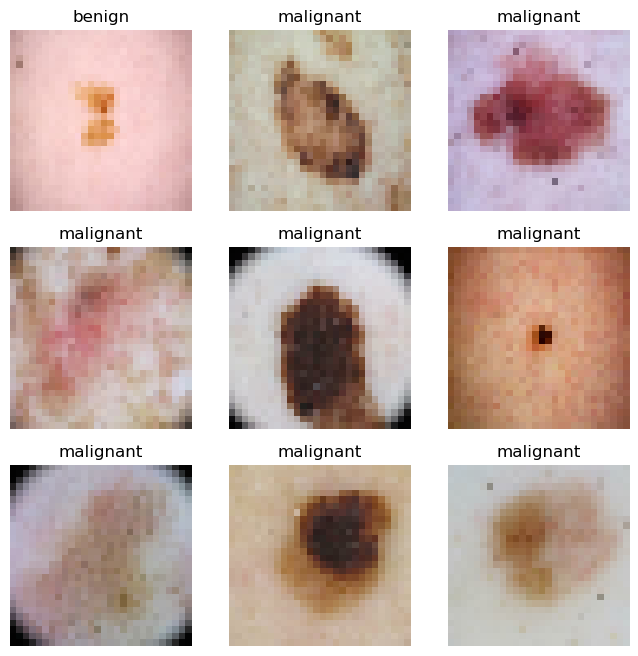

In [13]:
import matplotlib.pyplot as plt

###  training or validation data to visualize

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
num_classes = 2 # As target class 

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)         

In [40]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
271/271 [==============================] - 29s 64ms/step - loss: 0.3938 - accuracy: 0.8162 - val_loss: 0.3258 - val_accuracy: 0.8500
Epoch 2/25
271/271 [==============================] - 15s 56ms/step - loss: 0.2875 - accuracy: 0.8807 - val_loss: 0.2692 - val_accuracy: 0.8833
Epoch 3/25
271/271 [==============================] - 18s 66ms/step - loss: 0.2534 - accuracy: 0.8961 - val_loss: 0.2623 - val_accuracy: 0.8865
Epoch 4/25
271/271 [==============================] - 15s 57ms/step - loss: 0.2462 - accuracy: 0.8994 - val_loss: 0.2673 - val_accuracy: 0.8875
Epoch 5/25
271/271 [==============================] - 16s 58ms/step - loss: 0.2309 - accuracy: 0.9047 - val_loss: 0.2734 - val_accuracy: 0.8854
Epoch 6/25
271/271 [==============================] - 15s 57ms/step - loss: 0.2180 - accuracy: 0.9092 - val_loss: 0.2446 - val_accuracy: 0.8938
Epoch 7/25
271/271 [==============================] - 16s 60ms/step - loss: 0.2111 - accuracy: 0.9095 - val_loss: 0.2711 - val_accuracy:

In [41]:
model.save('model.h5')

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
import json
from joblib import dump, load

# convert the model to a JSON object
model_json = model.to_json()
# save the JSON object to a file

with open("model.json", "w") as json_file:
    json.dump(model_json, json_file)
    
    #save model
dump(model_json, 'seq_model.json')

['seq_model.json']

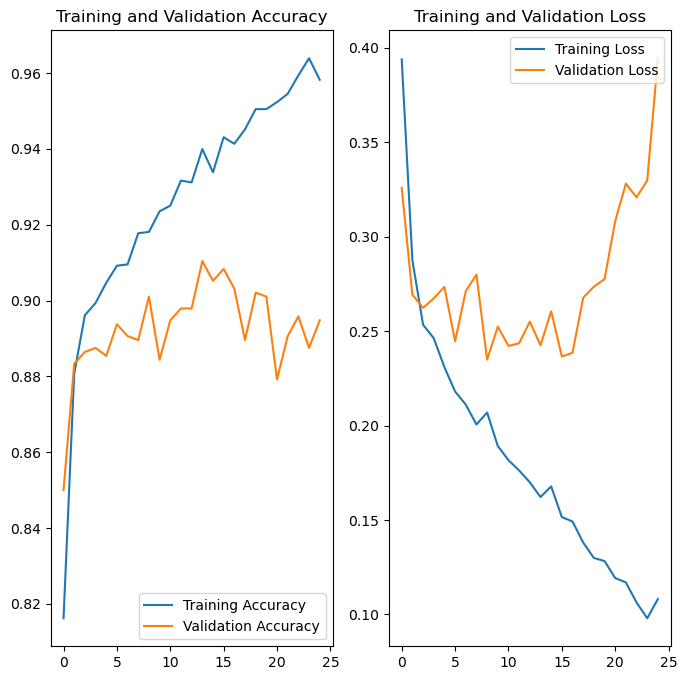

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

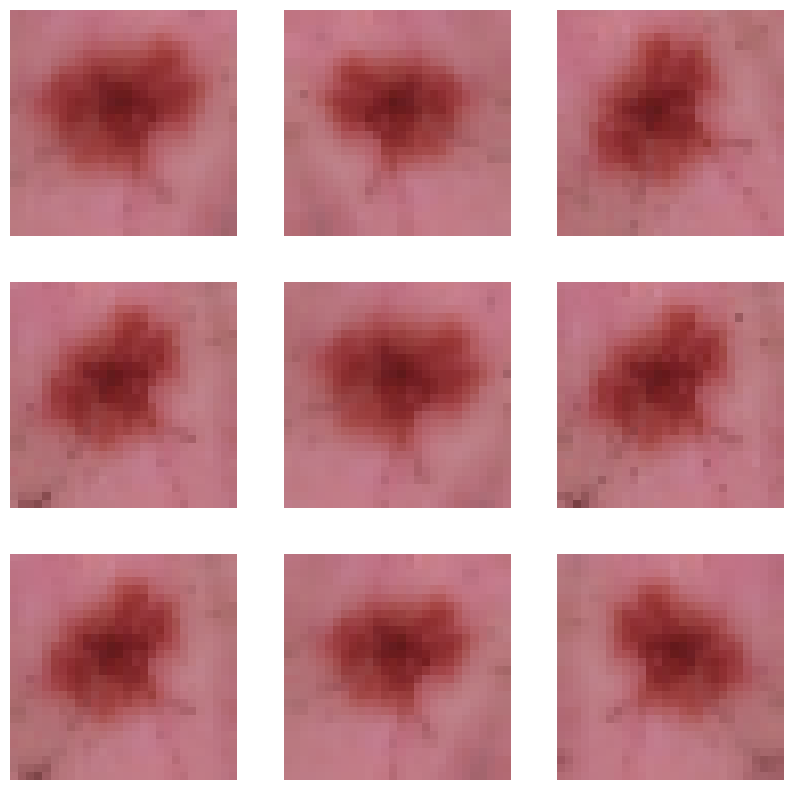

In [45]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [46]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28, 3)         0         
                                                                 
 rescaling_4 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                

In [48]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
271/271 [==============================] - 19s 51ms/step - loss: 0.4350 - accuracy: 0.7865 - val_loss: 0.3363 - val_accuracy: 0.8542
Epoch 2/25
271/271 [==============================] - 13s 49ms/step - loss: 0.3165 - accuracy: 0.8654 - val_loss: 0.2773 - val_accuracy: 0.8906
Epoch 3/25
271/271 [==============================] - 17s 63ms/step - loss: 0.2962 - accuracy: 0.8706 - val_loss: 0.2833 - val_accuracy: 0.8729
Epoch 4/25
271/271 [==============================] - 18s 66ms/step - loss: 0.2877 - accuracy: 0.8762 - val_loss: 0.2565 - val_accuracy: 0.8938
Epoch 5/25
271/271 [==============================] - 17s 64ms/step - loss: 0.2829 - accuracy: 0.8774 - val_loss: 0.3074 - val_accuracy: 0.8646
Epoch 6/25
271/271 [==============================] - 17s 64ms/step - loss: 0.2736 - accuracy: 0.8858 - val_loss: 0.2509 - val_accuracy: 0.8938
Epoch 7/25
271/271 [==============================] - 17s 63ms/step - loss: 0.2698 - accuracy: 0.8846 - val_loss: 0.2566 - val_accuracy:

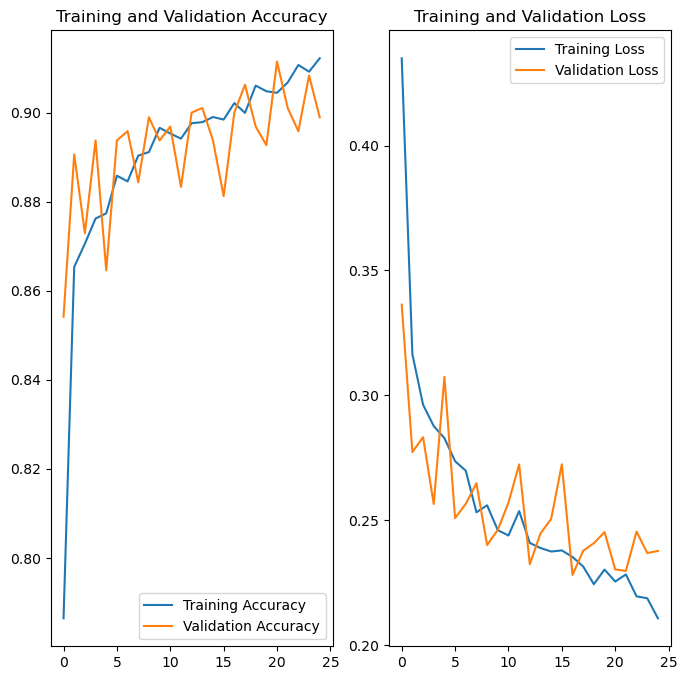

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_train, '*', '*.jpg')) ]
print(len(lesion_list))

9605


In [51]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('E:\\img\\melanoma_cancer_dataset\\train\\benign\\melanoma_0.jpg', 'benign'), ('E:\\img\\melanoma_cancer_dataset\\train\\benign\\melanoma_1.jpg', 'benign')]


In [52]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,E:\img\melanoma_cancer_dataset\train\benign\me...,benign
1,E:\img\melanoma_cancer_dataset\train\benign\me...,benign
2,E:\img\melanoma_cancer_dataset\train\benign\me...,benign
3,E:\img\melanoma_cancer_dataset\train\benign\me...,benign
4,E:\img\melanoma_cancer_dataset\train\benign\me...,benign


In [53]:
original_df[['Label']].value_counts()

Label    
benign       5000
malignant    4605
dtype: int64

In [54]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


Predictions:
 [1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1]
Labels:
 [0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1]


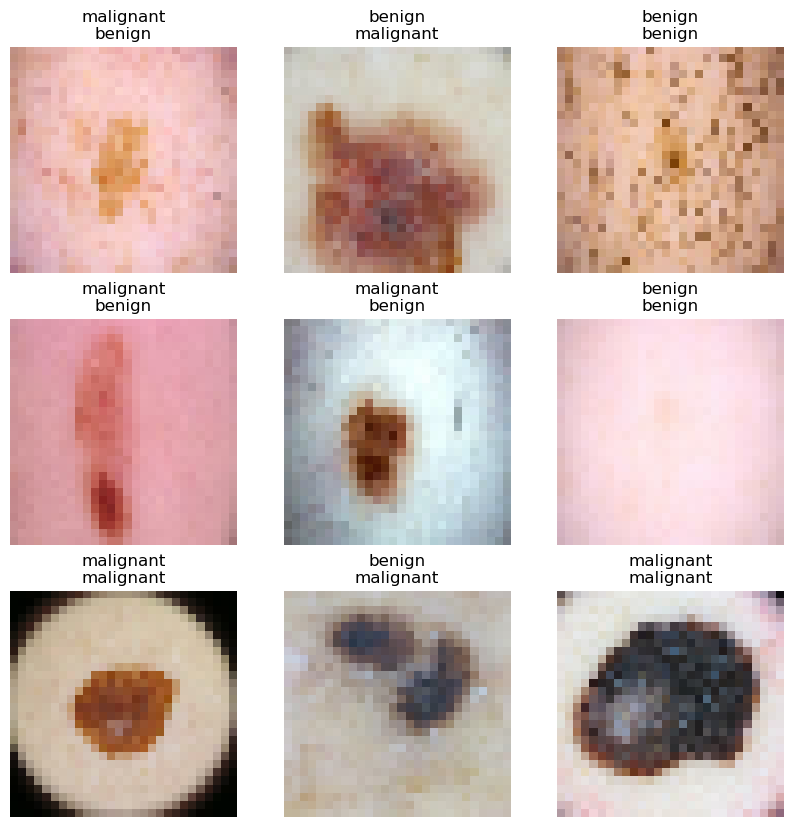

In [55]:
#Retrieve a batch of images 
image_batch, label_batch =test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")

In [56]:
original_df[['Label']].value_counts(normalize=True)

Label    
benign       0.520562
malignant    0.479438
dtype: float64

In [57]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dataset = image_dataset_from_directory(data_test, image_size=(img_height, img_width), 
                                           batch_size=batch_size)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 1000 files belonging to 2 classes.


In [60]:
!pip install gradio
import gradio as gr

# Assuming you have a model defined somewhere, import it here
# Example:
# from tensorflow.keras.models import load_model
# model = load_model('your_model_path')

def cancer_predict(img):
    img = img.reshape(1, 100, 100, 1)
    prediction = model.predict(img).tolist()[0]
    class_names = [
        "actinic keratosis", "dermatofibroma", "basal cell carcinoma",
        "melanoma", "nevus", "pigmented benign keratosis",
        "seborrheic keratosis", "vascular lesion", "squamous cell carcinoma"
    ]
    return {class_names[i]: prediction[i] for i in range(9)}  # Change range to 9

# Set the user uploaded image as the input array
# Match the same shape as the input shape in the model
im = gr.inputs.Image(shape=(100, 100, 1), image_mode='L', invert_colors=False, source="upload")

# Setup the interface
iface = gr.Interface(
    fn=cancer_predict,
    inputs=im,
    outputs=gr.outputs.Label(),
)
iface.launch(share=True)


ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (C:\Users\asus\anaconda3\Lib\site-packages\typing_extensions.py)

In [24]:
pip install torch

                                              0.0/192.3 MB ? eta -:--:--
                                              0.0/192.3 MB 1.4 MB/s eta 0:02:21
                                              0.0/192.3 MB 1.4 MB/s eta 0:02:21
                                              0.0/192.3 MB 1.4 MB/s eta 0:02:21
                                            0.1/192.3 MB 476.3 kB/s eta 0:06:44
                                            0.1/192.3 MB 476.3 kB/s eta 0:06:44
                                            0.1/192.3 MB 502.3 kB/s eta 0:06:23
                                            0.2/192.3 MB 482.7 kB/s eta 0:06:39
                                            0.2/192.3 MB 482.7 kB/s eta 0:06:39
                                            0.2/192.3 MB 482.7 kB/s eta 0:06:39
                                            0.2/192.3 MB 492.1 kB/s eta 0:06:31
                                            0.3/192.3 MB 517.0 kB/s eta 0:06:12
                                            0.3

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 27, 27, 96)        384       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                      

In [25]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

model=Sequential()

model.add(Conv2D(64,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(1024,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(1024,(1,1),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
#
model.add(Dropout(0.3))
model.add(Conv2D(1024,(1,1),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())

#
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 27, 27, 64)        832       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 512)       131584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 512)         0         
 ng2D)                                                           
                                                      